<a href="https://colab.research.google.com/github/DianaCorderoF/ML_DCCF/blob/main/Tarea_3_Estad%C3%ADstica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.14      0.22        22
         1.0       0.42      0.51      0.46        49
         2.0       0.53      0.54      0.54        85
         3.0       0.54      0.45      0.49        86
         4.0       0.87      0.94      0.90       237

    accuracy                           0.70       479
   macro avg       0.59      0.52      0.52       479
weighted avg       0.69      0.70      0.69       479

Confusion Matrix:
[[  3  13   3   2   1]
 [  1  25  18   3   2]
 [  0  17  46  19   3]
 [  0   2  17  39  28]
 [  1   2   2   9 223]]
Accuracy Score:
0.7014613778705637
              Feature  Importance
6            Absences    0.426174
0           StudentID    0.143769
5     StudyTimeWeekly    0.124029
8     ParentalSupport    0.053452
1                 Ag

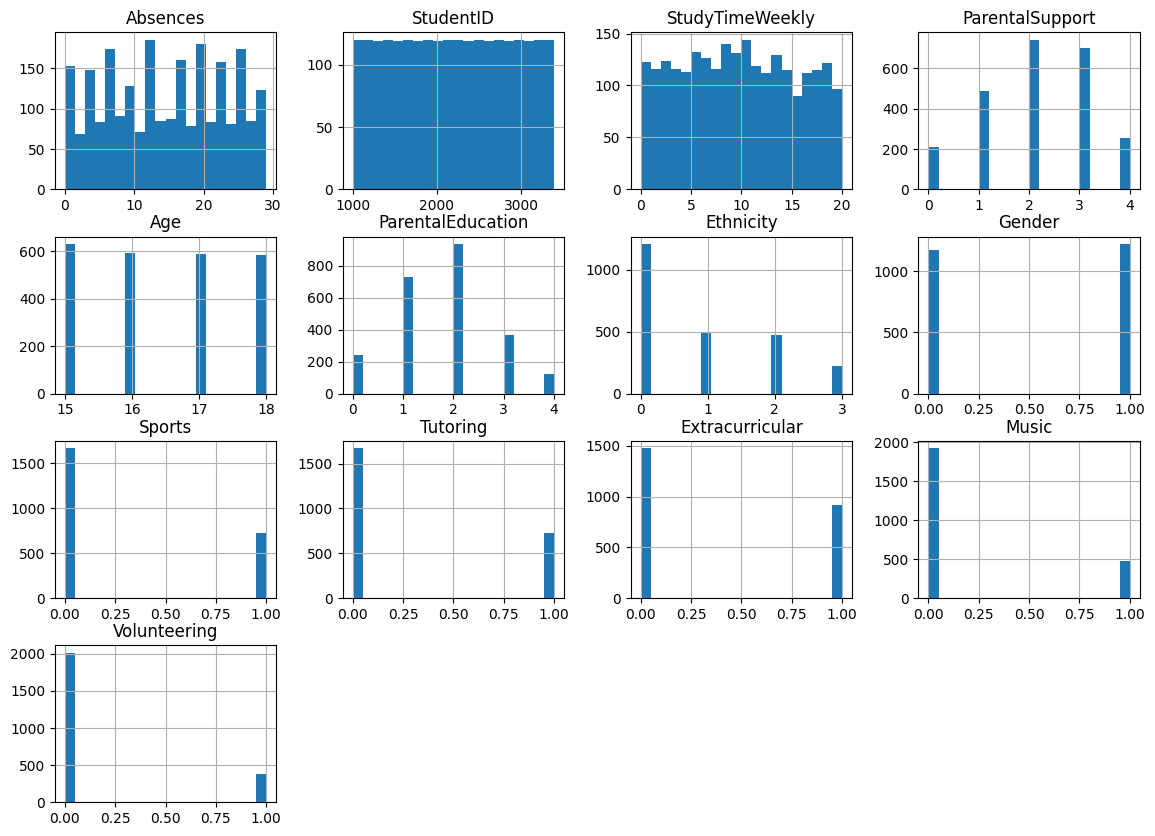

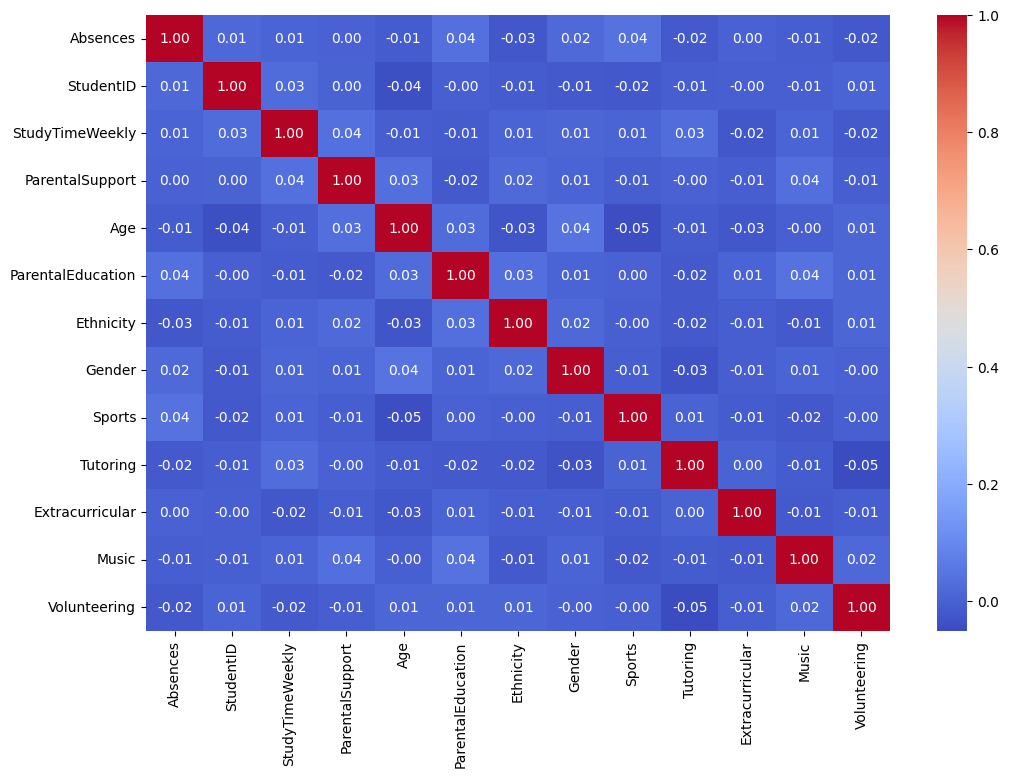

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')


# Leer el archivo CSV a un DataFrame de pandas
# Asegúrate de reemplazar 'ruta_completa_al_archivo.csv' con la ruta exacta
df = pd.read_csv('/content/drive/MyDrive/AA_DCCF/SPD2.csv')


# Análisis de valores nulos y eliminación de columnas con más del 50% de valores faltantes
missing_values = df.isnull().mean()
threshold = 0.5
to_drop = missing_values[missing_values > threshold].index
df_reduced = df.drop(to_drop, axis=1)

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_reduced)

# Convertir a DataFrame nuevamente y asignar nombres de columnas
original_columns = df_reduced.columns  # columnas originales excluyendo 'GradeClass'
df_imputed = pd.DataFrame(df_imputed, columns=original_columns)

# Separar las características (X) de la variable objetivo (y)
X = df_imputed.drop('GradeClass', axis=1)
y = df_imputed['GradeClass']

# Análisis de varianza
selector = VarianceThreshold(threshold=0.1)
X_reduced = selector.fit_transform(X)

# Convertir de nuevo a DataFrame y asignar nombres de columnas
X_reduced = pd.DataFrame(X_reduced, columns=X.columns[selector.get_support()])

# Análisis de correlación y eliminación de columnas altamente correlacionadas
corr_matrix = X_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_reduced = X_reduced.drop(to_drop, axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Importancia de las características
feature_importances = model.feature_importances_
features = X_reduced.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Eliminar características menos importantes según un umbral (por ejemplo, 0.01)
threshold_importance = 0.01
to_keep = importance_df[importance_df['Importance'] > threshold_importance]['Feature']
df_final = X_reduced[to_keep]

# Mostrar el dataset reducido final
print(df_final.head())

# Histogramas del dataset final
df_final.hist(bins=20, figsize=(14, 10))
plt.show()

# Gráfico de correlación del dataset final
corr_matrix = df_final.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()